# Universidad Nacional de Colombia - Reconicimiento de Patrones
## Análisis de Componentes Principales
### Sergio Velez, Estefany Orozco, Felipe Garcia
### Marzo 2019

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Funcion de Graficos
def plotPCA(X_pca, Y, k):
    colors = ['red', 'blue']
    target_names = ['No', 'Yes']

    color = [colors[i] for i in Y]
    label = [target_names[i] for i in Y]

    plt.figure(figsize=(20,30))
    plt.title("Dataset projection over first 2 PC")

    for i in range (1, k):
        plt.subplot(5, 2, i)
        plt.scatter(X_pca[:, i-1], X_pca[:, i], color=color)

        plt.xlabel(r'$\lambda_0$', fontsize=15)
        plt.ylabel(r'$\lambda_1$', fontsize=15)
        plt.grid(True)
    plt.show()

In [27]:
#Carga del Archivo CSV
bank_df = pd.read_csv("bank/transformed_bank.csv", sep=',',header=0)
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,technician,0,secondary,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,entrepreneur,1,secondary,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,blue-collar,1,unknown,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,unknown,0,unknown,0,1,0,0,2,5,may,198,1,-1,0,3,0


In [28]:
# Seleccion del los atributos numericos y la clase
X = bank_df.iloc[:,0:16]
X_num = X.select_dtypes([np.number])

y = bank_df['y']

In [29]:
# Matriz de Correlacion de los atributos numericos
x_corr = X.corr()
x_corr

,age,marital,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome
age,1.000000,0.403240,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.003707
marital,0.403240,1.000000,0.007023,-0.002122,0.016096,0.046893,0.039201,0.005261,-0.011852,0.008994,-0.019172,-0.014973,0.017696
default,-0.017879,0.007023,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,-0.010021,0.016822,-0.029979,-0.018329,0.036545
balance,0.097783,-0.002122,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.025886
housing,-0.185513,0.016096,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.076039
loan,-0.015655,0.046893,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,-0.012412,0.009980,-0.022754,-0.011043,0.023588
contact,0.026221,0.039201,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,-0.020839,0.019614,-0.244816,-0.147811,0.271415
day,-0.009120,0.005261,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.083046
duration,-0.004648,-0.011852,-0.010021,0.021560,0.005075,-0.012412,-0.020839,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.002854
campaign,0.004760,0.008994,0.016822,-0.014578,-0.023599,0.009980,0.019614,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.108882


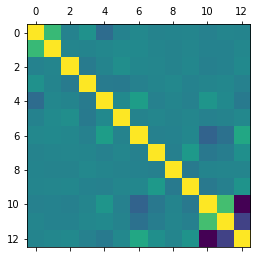

In [30]:
# Grafica de la Matriz de Correlacion
plt.matshow(x_corr)
plt.show()

In [36]:
#Muestreo Aleatorio del Conjunto de Datos
k=8 #best 8 independets features
X_set = X_num.sample(frac=0.3)
Y_set =  y.loc[X_set.index.values]

# Feature Selection

<hr>

### Statistical Test $\chi^2$


In [37]:
# Carga de librerias
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from tabulate import tabulate
from sklearn.decomposition import PCA

In [41]:
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_set, Y_set)
sel_features = np.squeeze(np.where(selector.get_support()==True)) #Where selection is True?

In [42]:
headers = ["F"+str(i+1) for i in sel_features]
table = tabulate(X_new[0:20], headers, tablefmt="fancy_grid")
print(table)

╒══════╤══════╤══════╤══════╤═══════╤═══════╤═══════╤═══════╕
│   F5 │   F6 │   F7 │   F9 │   F10 │   F11 │   F12 │   F13 │
╞══════╪══════╪══════╪══════╪═══════╪═══════╪═══════╪═══════╡
│    1 │    0 │    0 │  134 │     2 │    -1 │     0 │     3 │
├──────┼──────┼──────┼──────┼───────┼───────┼───────┼───────┤
│    1 │    0 │    0 │  253 │     3 │   280 │     2 │     0 │
├──────┼──────┼──────┼──────┼───────┼───────┼───────┼───────┤
│    1 │    0 │    0 │   83 │     2 │    -1 │     0 │     3 │
├──────┼──────┼──────┼──────┼───────┼───────┼───────┼───────┤
│    0 │    0 │    0 │  234 │     1 │    -1 │     0 │     3 │
├──────┼──────┼──────┼──────┼───────┼───────┼───────┼───────┤
│    0 │    0 │    2 │   22 │     1 │    -1 │     0 │     3 │
├──────┼──────┼──────┼──────┼───────┼───────┼───────┼───────┤
│    1 │    0 │    0 │   65 │     1 │    -1 │     0 │     3 │
├──────┼──────┼──────┼──────┼───────┼───────┼───────┼───────┤
│    0 │    1 │    0 │  171 │     1 │    -1 │     0 │     3 │
├──────┼

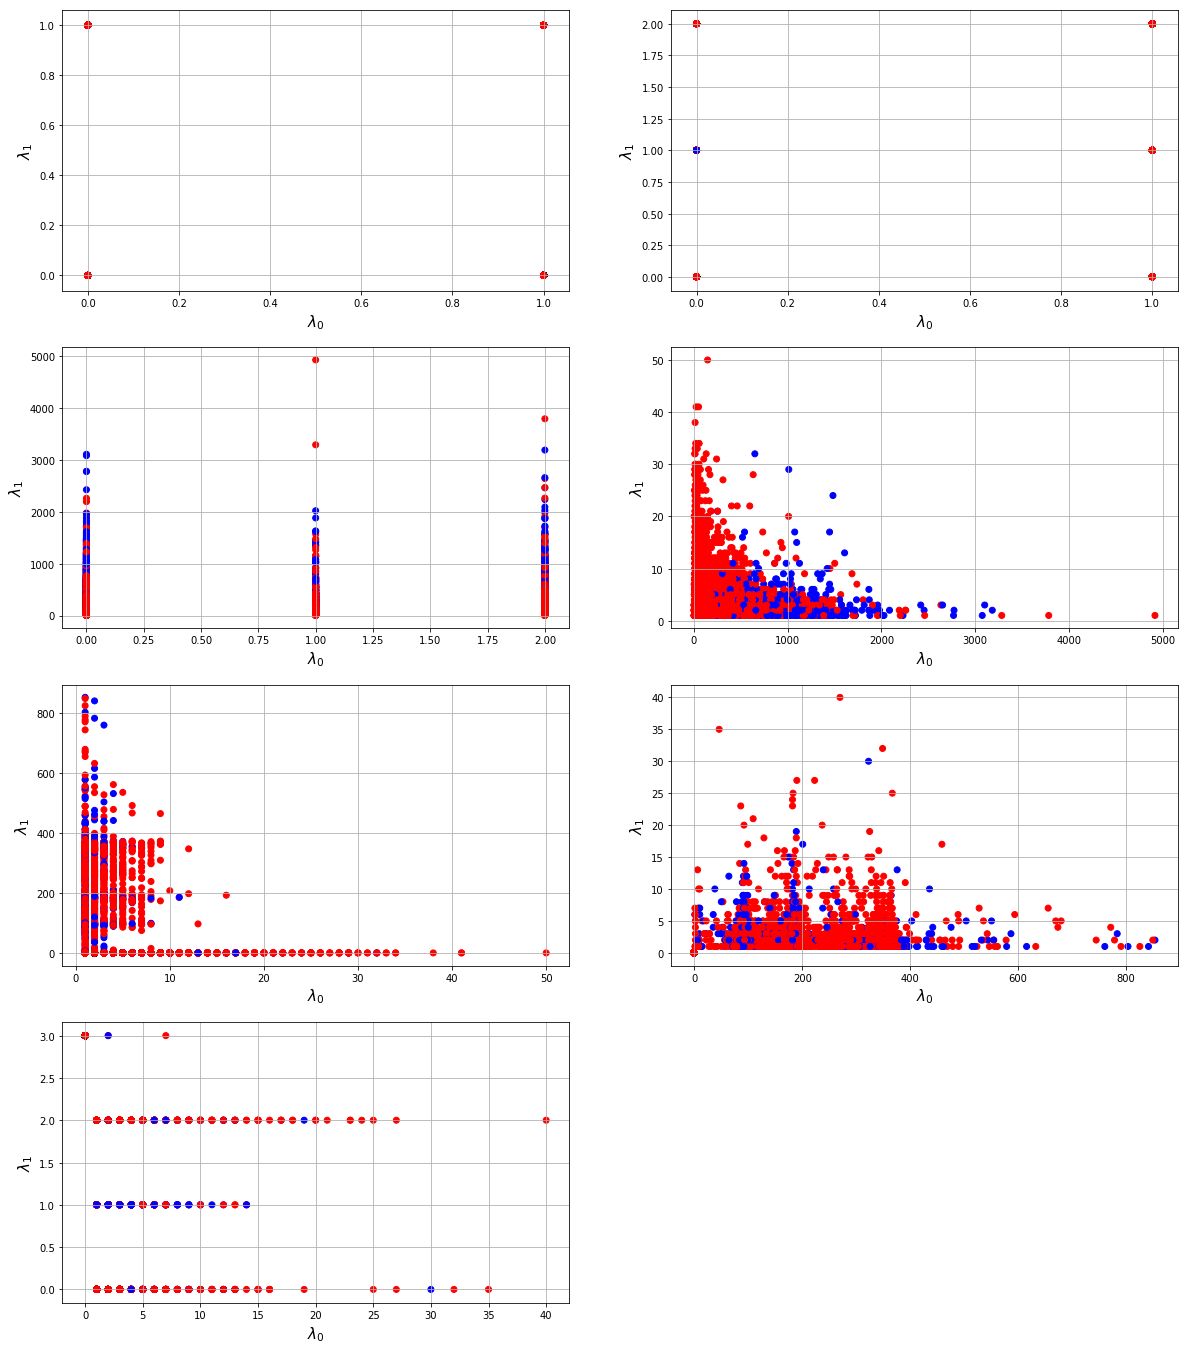

In [43]:
plotPCA(X_new, Y_set, k)

# Feature Extraction

### PCA Using Single Value Decomposition


In [44]:
# Carga librerias
from numpy.linalg import svd

In [45]:
# Apply Single Value Decomposition over X
X_centered = X_set - X_set.mean(axis=0)
U, s, Vt = svd(X_centered) 

In [46]:
#Project X over first principal components
V_prime = Vt.T[:, :k]
X2D = np.dot(X_centered, V_prime)

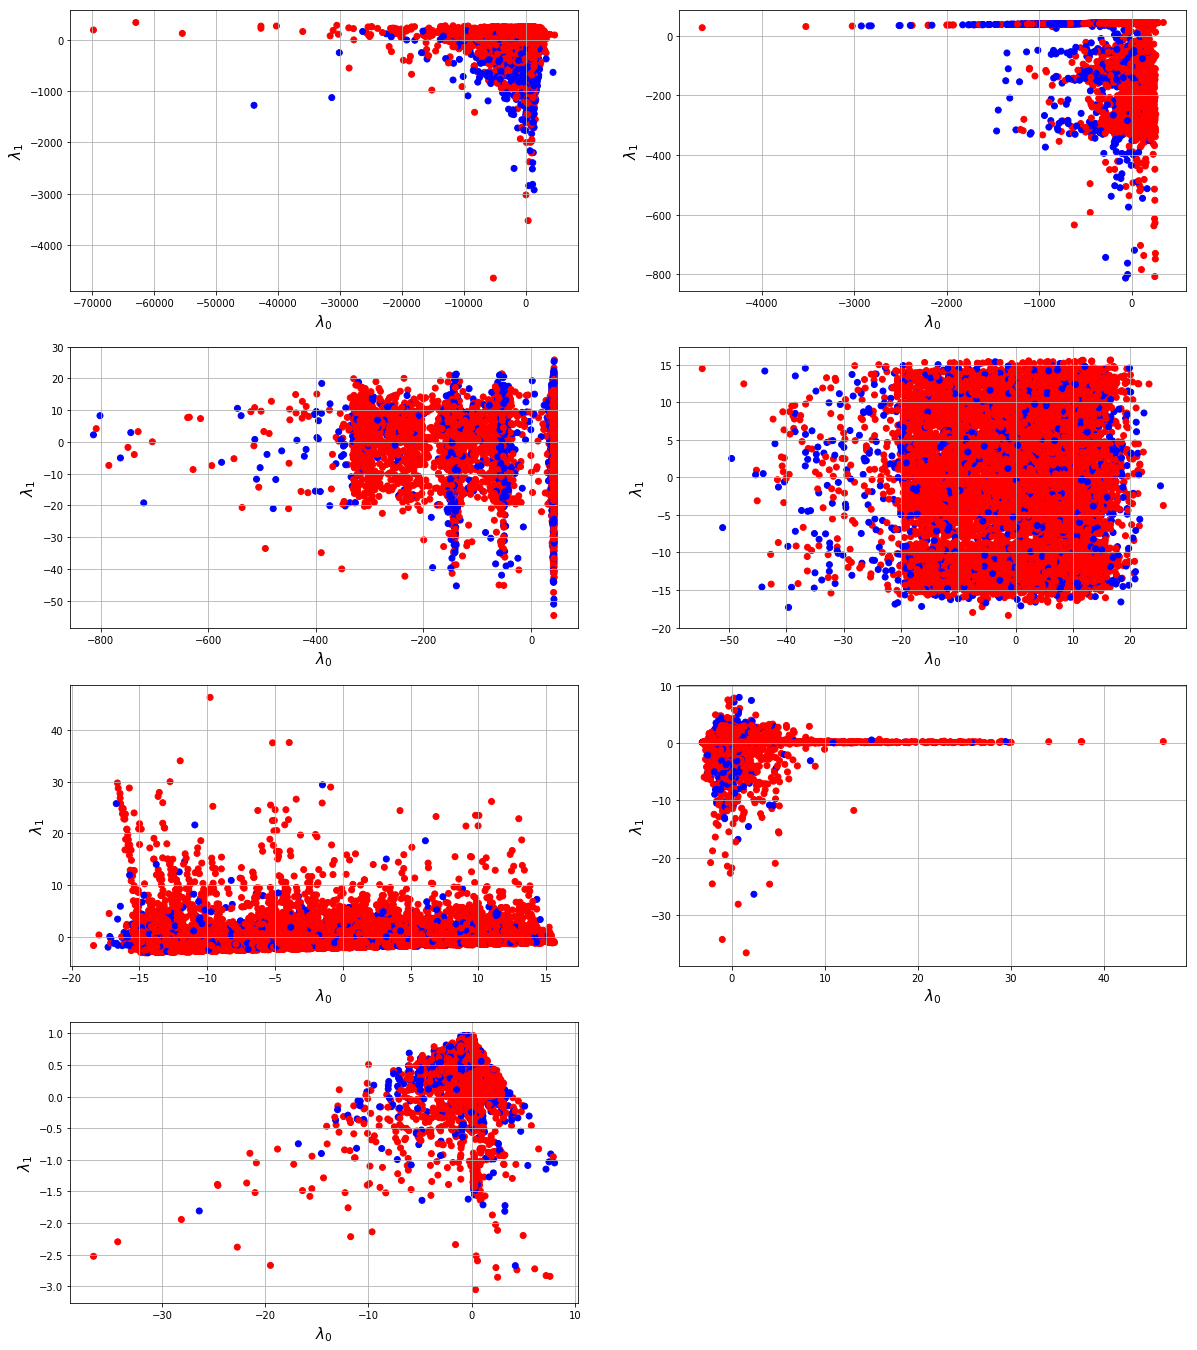

In [47]:
plotPCA(X2D, Y_set, k)

### PCA Using Scikit

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components = k)
X_new = pca.fit_transform(X_set)

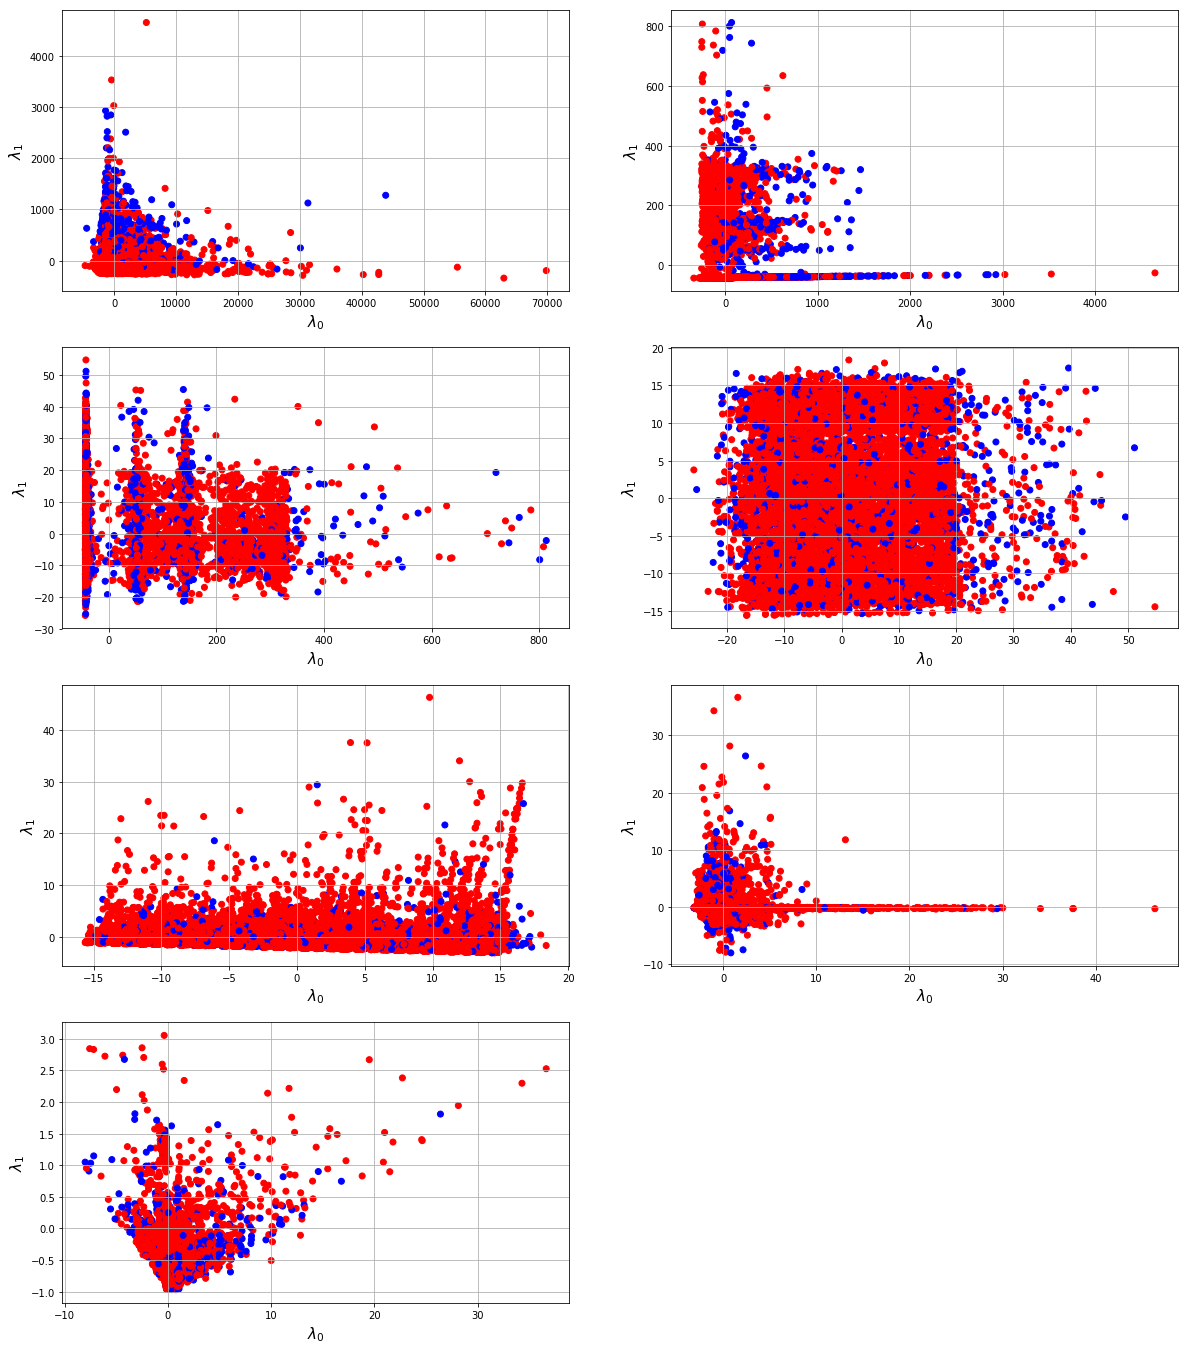

In [50]:
plotPCA(X_new, Y_set, k)

### Non-Linear (PCA) / Kernel PCA

In [51]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_set)

In [ ]:
plotPCA(X_kpca, Y_set, k)